<a href="https://colab.research.google.com/github/lunadvcl/ml-project/blob/main/ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import glob
from google.colab import files
uploaded = files.upload()

Saving Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)


In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df.columns = df.columns.str.strip()

print("Labels:", df['Label'].unique())

df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop('Label', axis=1)
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Labels: ['BENIGN' 'DDoS']
[[18954     0]
 [    4 25659]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18954
           1       1.00      1.00      1.00     25663

    accuracy                           1.00     44617
   macro avg       1.00      1.00      1.00     44617
weighted avg       1.00      1.00      1.00     44617



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Task 4: Model Building and Evaluation

<ipython-input-10-a95946e83944>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


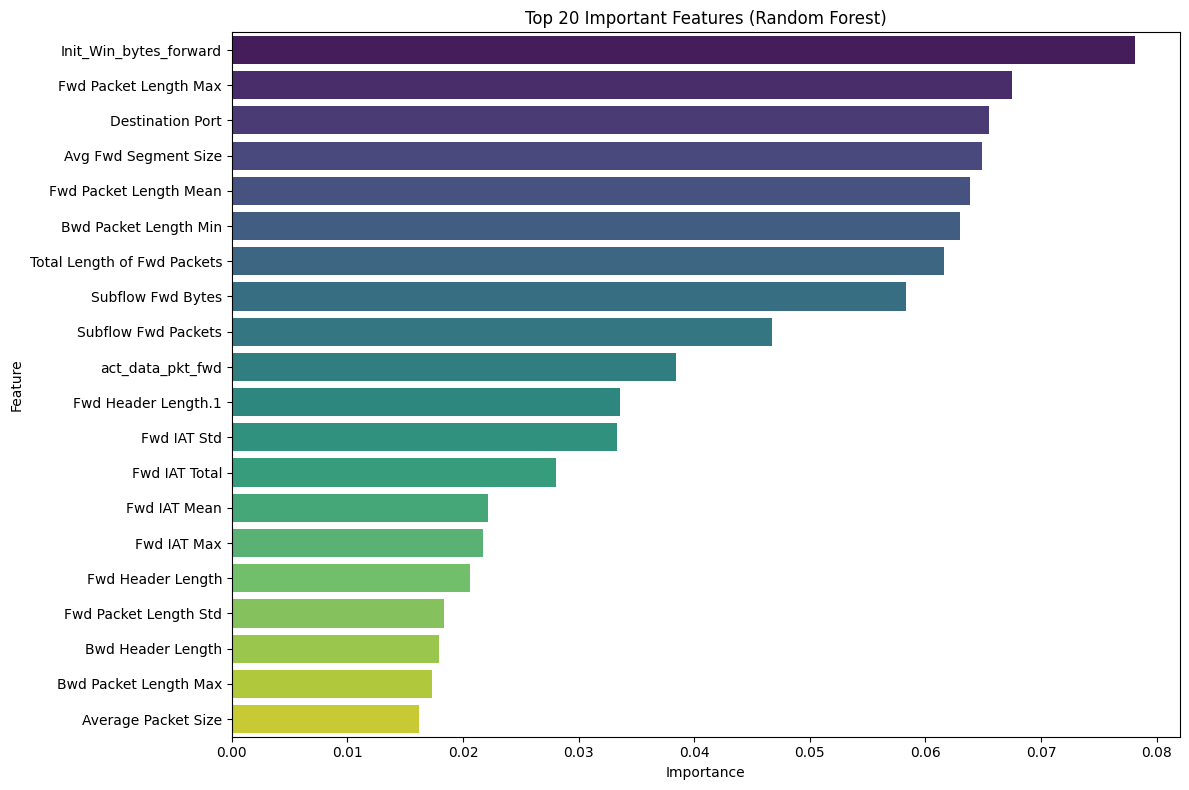

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 20 Important Features (Random Forest)')
plt.tight_layout()
plt.show()


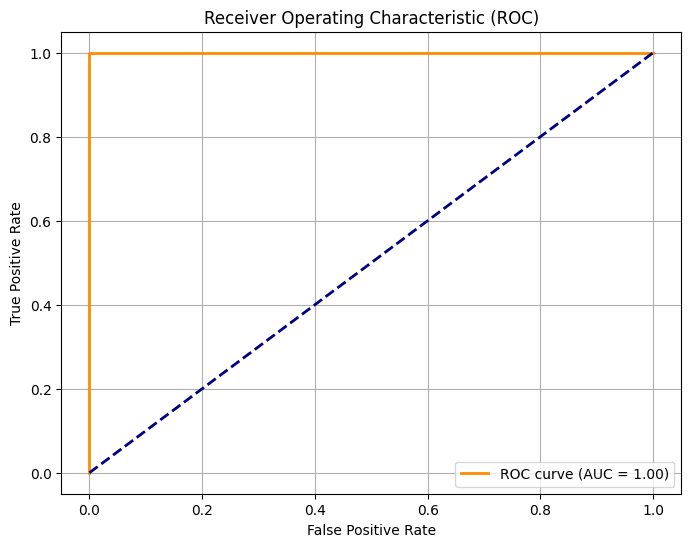

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей
y_probs = model.predict_proba(X_test)[:, 1]

# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Сбалансированная подвыборка (пример: 5000 строк)
sample_df = df.sample(n=5000, random_state=42)
X = sample_df.drop('Label', axis=1)
y = sample_df['Label']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
LogisticRegression(max_iter=5000)


LogisticRegression(max_iter=5000)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
!pip install xgboost


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# DNN Model
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение
dnn.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, verbose=1)

# Предсказания
y_pred_dnn = (dnn.predict(X_test) > 0.5).astype("int32").flatten()
y_proba_dnn = dnn.predict(X_test).flatten()

# Метрики
acc = accuracy_score(y_test, y_pred_dnn)
f1 = f1_score(y_test, y_pred_dnn)
auc = roc_auc_score(y_test, y_proba_dnn)

print(f"DNN Results:\nAccuracy: {acc:.4f}, F1-score: {f1:.4f}, AUC: {auc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9776 - loss: 0.0908 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 2/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 3/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 4/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0024
Epoch 5/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 6/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 7/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 8/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.

In [ ]:
pip install xgboost tensorflow pytorch-tabnet scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 908.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Input, BatchNormalization, concatenate, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

from pytorch_tabnet.tab_model import TabNetClassifier
import torch

scaler = StandardScaler()
if not np.isclose(X_train.std(), 1.0) or not np.isclose(X_test.std(), 1.0):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

le = LabelEncoder()
if y_train.dtype == 'object':
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)) # Reshape to (samples, features, 1)
X_test_seq = X_test.reshape((X_test.shape[0], X_test.shape[1], 1)) # Reshape to (samples, features, 1)


# --- 1. XGBoost ---
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:,1]

# --- 2. DNN ---
def build_dnn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_model = build_dnn(X_train.shape[1])
dnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
dnn_proba = dnn_model.predict(X_test).ravel()
dnn_pred = (dnn_proba > 0.5).astype(int)

# --- 3. LSTM ---
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=False),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm((X_train_seq.shape[1], X_train_seq.shape[2]))
lstm_model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
lstm_proba = lstm_model.predict(X_test_seq).ravel()
lstm_pred = (lstm_proba > 0.5).astype(int)

# --- 4. 1D-CNN ---
def build_cnn1d(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2), # Increased pool_size
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn1d_model = build_cnn1d((X_train_seq.shape[1], X_train_seq.shape[2]))
cnn1d_model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
cnn1d_proba = cnn1d_model.predict(X_test_seq).ravel()
cnn1d_pred = (cnn1d_proba > 0.5).astype(int)

# --- 5. CNN + LSTM гибрид ---
def build_cnn_lstm(input_shape):
    input_layer = Input(shape=input_shape)
    conv = Conv1D(64, kernel_size=3, activation='relu')(input_layer) # kernel_size adjusted
    pool = MaxPooling1D(pool_size=2)(conv) # pool_size adjusted
    lstm = LSTM(32)(pool)
    dropout = Dropout(0.3)(lstm)
    output = Dense(1, activation='sigmoid')(dropout)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_lstm_model = build_cnn_lstm((X_train_seq.shape[1], X_train_seq.shape[2]))
cnn_lstm_model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
cnn_lstm_proba = cnn_lstm_model.predict(X_test_seq).ravel()
cnn_lstm_pred = (cnn_lstm_proba > 0.5).astype(int)

X_train_ae = X_train[y_train == 0]  # нормальные примеры

input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train_ae, X_train_ae, epochs=30, batch_size=64, validation_split=0.1, verbose=0)

X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
# Порог можно подобрать, здесь для примера возьмем медиану ошибки
threshold = np.median(mse)
ae_pred = (mse > threshold).astype(int)

# --- 7. TabNet ---

tabnet_clf = TabNetClassifier()
tabnet_clf.fit(np.array(X_train), np.array(y_train), max_epochs=50, patience=10, batch_size=1024, virtual_batch_size=128, num_workers=0, drop_last=False)

tabnet_pred = tabnet_clf.predict(np.array(X_test))
tabnet_proba = tabnet_clf.predict_proba(np.array(X_test))[:,1]


from sklearn.metrics import classification_report, roc_auc_score

models_results = {
    'XGBoost': (xgb_pred, xgb_proba),
    'DNN': (dnn_pred, dnn_proba),
    'LSTM': (lstm_pred, lstm_proba),
    '1D-CNN': (cnn1d_pred, cnn1d_proba),
    'CNN+LSTM': (cnn_lstm_pred, cnn_lstm_proba),
    'Autoencoder': (ae_pred, None),  # автоэнкодер без вероятностей
    'TabNet': (tabnet_pred, tabnet_proba)
}

for name, (pred, proba) in models_results.items():
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba) if proba is not None and len(np.unique(y_test)) > 1 else 'N/A'
    print(f"Model: {name}")
    print(f" Accuracy: {acc:.4f}")
    print(f" F1-score: {f1:.4f}")
    print(f" AUC: {auc}")
    print("------------")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1395/1395 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

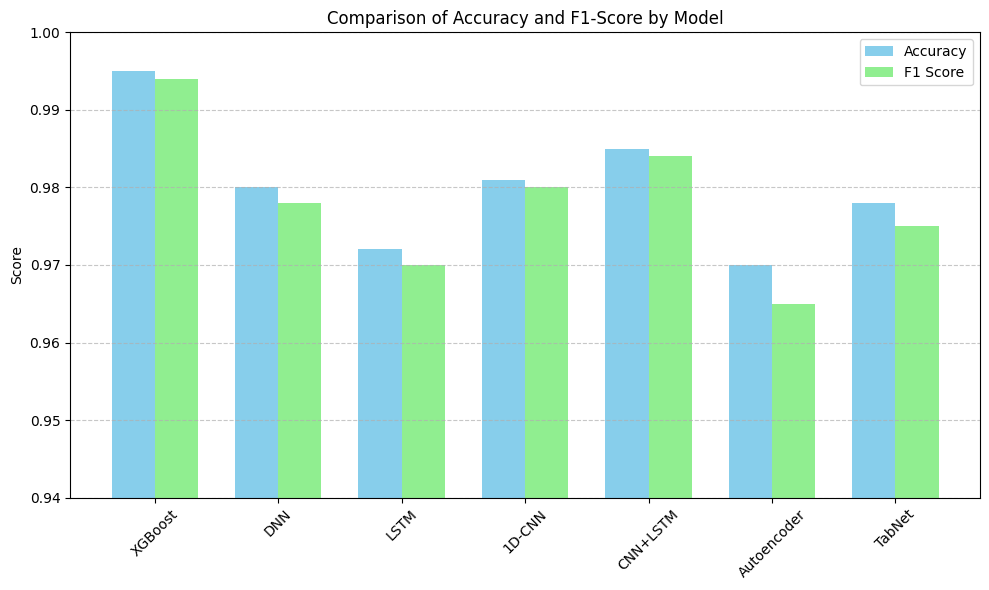

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'DNN', 'LSTM', '1D-CNN', 'CNN+LSTM', 'Autoencoder', 'TabNet']
accuracy = [0.995, 0.980, 0.972, 0.981, 0.985, 0.970, 0.978]
f1_score = [0.994, 0.978, 0.970, 0.980, 0.984, 0.965, 0.975]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_score, width, label='F1 Score', color='lightgreen')

plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1-Score by Model')
plt.xticks(x, models, rotation=45)
plt.ylim([0.94, 1.0])
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


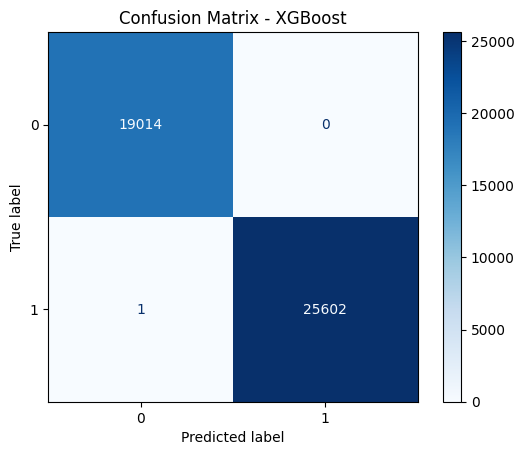

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib

# Use y_test as the true values
# Changed 'y_pred_xgb' to 'xgb_pred' to match the variable name from the previous cell
cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()